# K-Nearest Neighbours, Decision Tree, Random Forest 

### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Importing Data 


In [2]:
x_train=pd.read_csv('../Data/x_train.csv')
x_test=pd.read_csv('../Data/x_test.csv')
y_train=pd.read_csv('../Data/y_train.csv')
y_test=pd.read_csv('../Data/y_test.csv')

### Drop non-important columns

In [3]:
x_train = x_train.drop(['EventID', 'Latitude', 'Longitude', 'TotalFatalInjuries',
         'TotalSeriousInjuries', 'TotalMinorInjuries', 'TotalUninjured', 'TotalInjuries',
         'EventDate', 'Year', 'Country', 'InjurySeverity', 'InvestigationType', 'ReportStatus'],axis=1)
x_test = x_test.drop(['EventID', 'Latitude', 'Longitude', 'TotalFatalInjuries',
         'TotalSeriousInjuries', 'TotalMinorInjuries', 'TotalUninjured', 'TotalInjuries',
         'EventDate', 'Year', 'Country', 'InjurySeverity', 'InvestigationType', 'ReportStatus'],axis=1)

### Hot Encoding to convert categorical data to numerical

In [4]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

# Converting categorical values to numerical
x_train['WeatherCondition'] = labelencoder.fit_transform(x_train['WeatherCondition'])
x_train['BroadPhaseOfFlight'] = labelencoder.fit_transform(x_train['BroadPhaseOfFlight'])
x_train['PurposeOfFlight'] = labelencoder.fit_transform(x_train['PurposeOfFlight'])
x_train['EngineType'] = labelencoder.fit_transform(x_train['EngineType'])
y_train = labelencoder.fit_transform(y_train)

x_test['WeatherCondition'] = labelencoder.fit_transform(x_test['WeatherCondition'])
x_test['BroadPhaseOfFlight'] = labelencoder.fit_transform(x_test['BroadPhaseOfFlight'])
x_test['PurposeOfFlight'] = labelencoder.fit_transform(x_test['PurposeOfFlight'])
x_test['EngineType'] = labelencoder.fit_transform(x_test['EngineType'])
y_test = labelencoder.fit_transform(y_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
x_train.head()

,WeatherCondition,BroadPhaseOfFlight,PurposeOfFlight,EngineType,Month
0,0,0,14,6,5
1,2,5,14,6,8
2,2,9,14,6,4
3,0,9,21,10,1
4,2,2,21,12,5


## Models

In [6]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

## K-Nearest Neighbour

In [7]:
accuracies = {}
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 61.48%


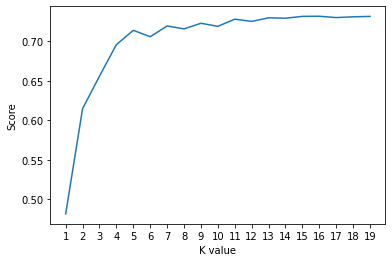

Maximum KNN Score is 73.18%


In [8]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

## Decision Tree Classifier

In [9]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(random_state=4, max_depth=2)
dtc.fit(x_train.T, y_train.T)

acctrain = dtc.score(x_train.T, y_train.T)*100
acctest = dtc.score(x_test.T, y_test.T)*100

accuracies['Decision Tree'] = acctest

print("Decision Tree Train Accuracy {:.2f}%".format(acctrain))
print("Decision Tree Test Accuracy {:.2f}%".format(acctest))

Decision Tree Train Accuracy 73.54%
Decision Tree Test Accuracy 73.43%


## Random Forest Classifier

In [10]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acctrain = rf.score(x_train.T, y_train.T)*100
acctest = rf.score(x_test.T, y_test.T)*100

accuracies['Random Forest'] = acctest

print("Random Forest Train Accuracy Score : {:.2f}%".format(acctrain))
print("Random Forest Test Accuracy Score : {:.2f}%".format(acctest))

Random Forest Train Accuracy Score : 78.29%
Random Forest Test Accuracy Score : 72.68%


## Comparing Models

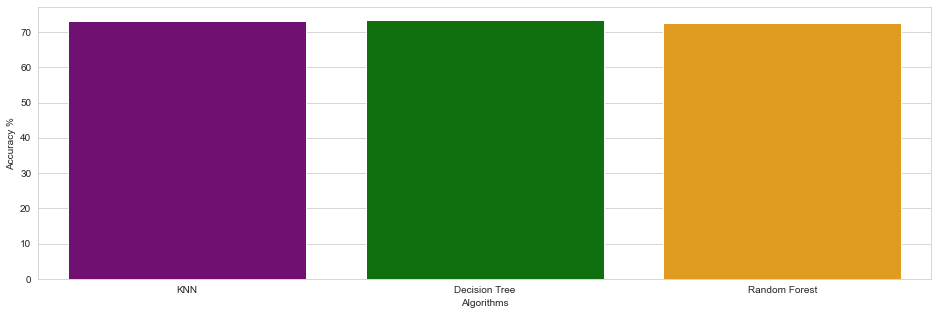

In [11]:
colors = ["purple", "green", "orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Feature Importance
Since the random forest algorithm has the highest accuracy, we'll look at the feature importance based on that

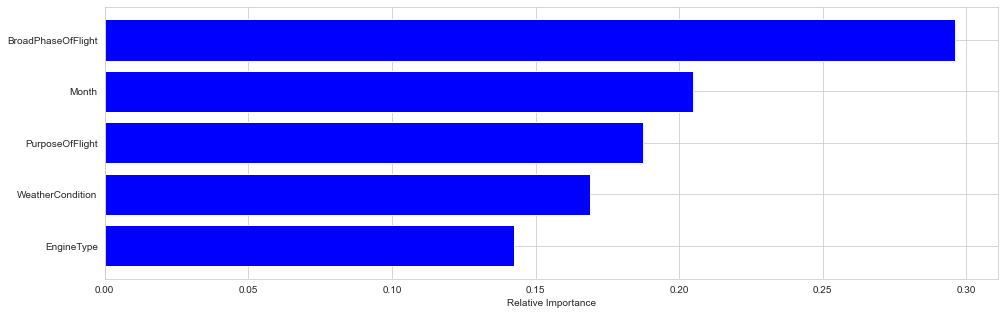

In [12]:
x_train = x_train.T
features = x_train.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(16,5))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()